In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import torch

import tensorcraft as tc

In [2]:
LATEX_WIDTH = 517.935  # Doc
# LATEX_WIDTH = 444.14774 # Doc


figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update(
    {
        "figure.figsize": figSize,
        "figure.dpi": 200,
        # "figure.autolayout": True,
        "text.usetex": True,
        "font.family": "serif",
        "font.size": fontsize,
        "axes.labelsize": fontsize_small,
        "legend.fontsize": fontsize_small,
        "xtick.labelsize": fontsize_small,
        "ytick.labelsize": fontsize_small,
    }
)

In [ ]:
import networkx as nx

graph = nx.grid_graph(dim=(5, 2))
graph.nodes()

In [ ]:
mesh = torch.Size((2, 3))
fig = plt.figure()
tc.viz.draw_2d_mesh(fig.add_subplot(111), mesh)

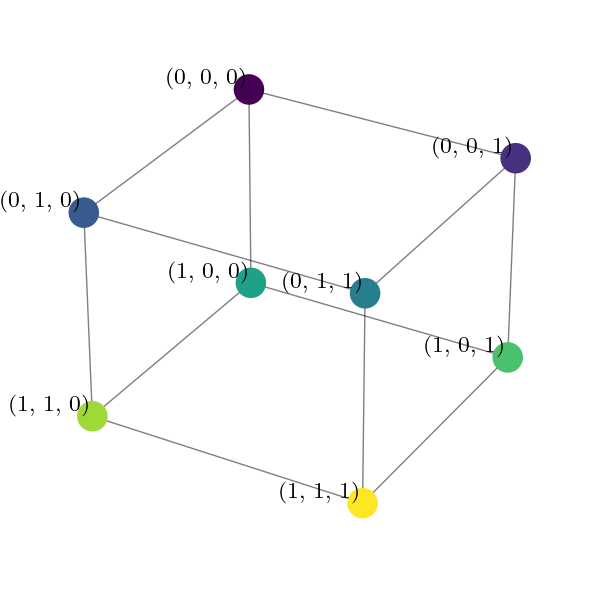

In [5]:
fig = plt.figure()
mesh = torch.Size((2, 2, 2))

tc.viz.draw_3d_mesh(fig.add_subplot(111, projection="3d"), mesh)

subplot_x: 3, subplot_y: 3
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]
p_midx: (0, 0), p: 0, subplot: (0, tensor(0))
p_midx: (0, 1), p: 1, subplot: (0, tensor(1))
p_midx: (0, 2), p: 2, subplot: (0, tensor(2))
p_midx: (1, 0), p: 3, subplot: (1, tensor(0))
p_midx: (1, 1), p: 4, subplot: (1, tensor(1))
p_midx: (1, 2), p: 5, subplot: (1, tensor(2))
p_midx: (2, 0), p: 6, subplot: (2, tensor(0))
p_midx: (2, 1), p: 7, subplot: (2, tensor(1))
p_midx: (2, 2), p: 8, subplot: (2, tensor(2))


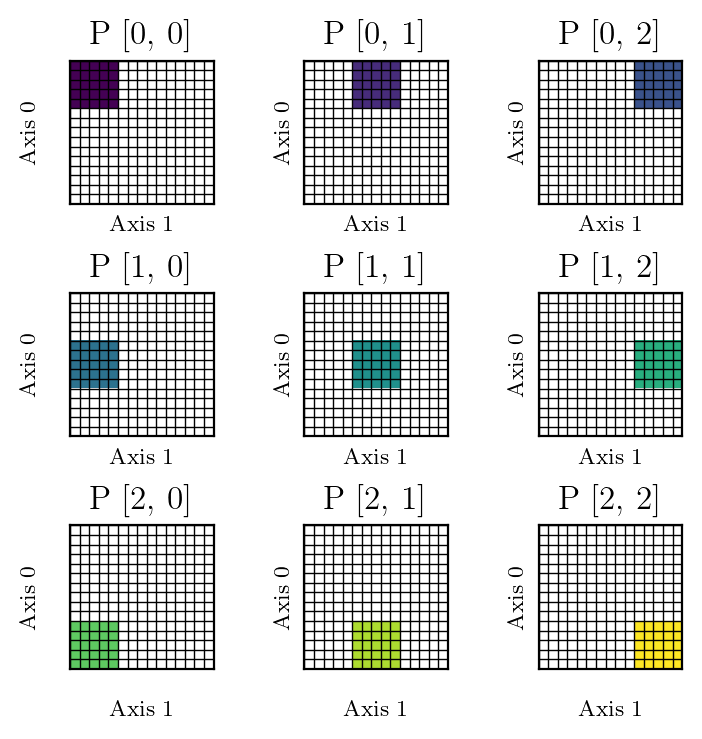

In [6]:
import math

mesh = torch.Size((3,3))
d = tc.dist.MultiAxisDist(mesh, ((0,), (1,)), (5, 5))
tensor_shape = torch.Size((15, 15))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")
print(axs)

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if subplot_y == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p)

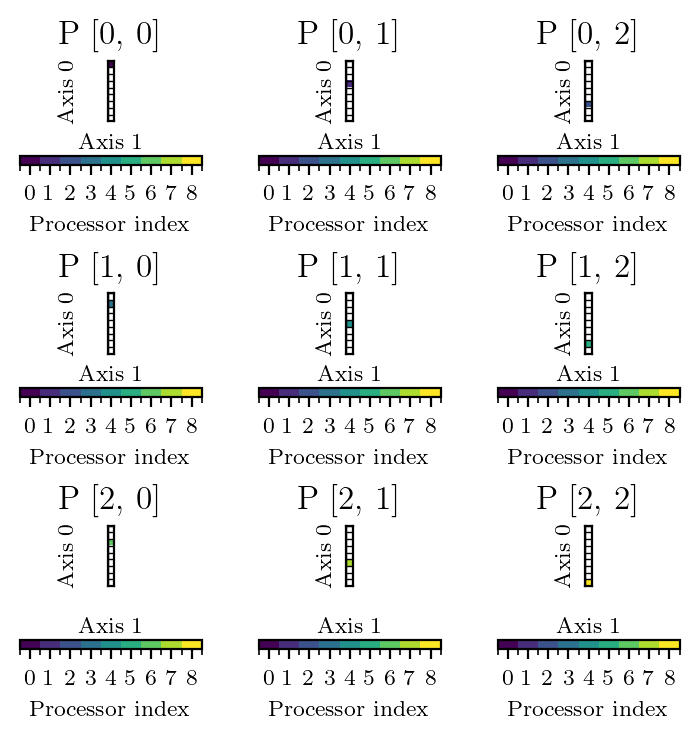

In [7]:
import math

mesh = torch.Size((3, 3))
d = tc.dist.MultiAxisDist(mesh, ((1,0),()), (1,1))
tensor_shape = torch.Size((9,1))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

# print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    # print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if len(mesh) == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p, cbar=True)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p, cbar=True)

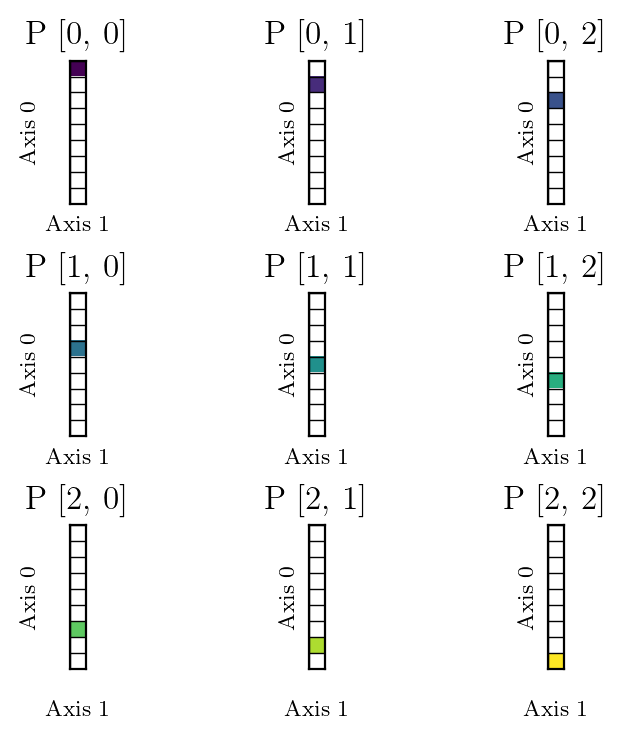

In [8]:
mesh = torch.Size((3, 3))
d = tc.dist.MultiAxisDist(mesh, ((0,1),()), (1,1))
tensor_shape = torch.Size((9,1))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

# print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    # print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if len(mesh) == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p)

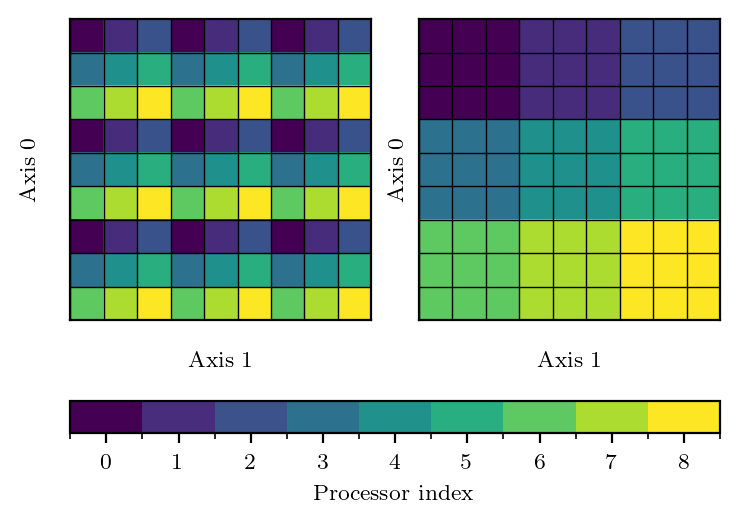

In [9]:

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=1, ncols=2)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

mesh = torch.Size((3, 3))
d = tc.dist.MultiAxisDist(mesh, ((0,), (1,)), (1, 1))
tensor = torch.Size((9, 9))
tc.viz.draw_2d_tensor(axs[0], tensor, d)

d = tc.dist.MultiAxisDist(mesh, ((0,), (1,)), (3, 3))
tensor = torch.Size((9, 9))
tc.viz.draw_2d_tensor(axs[1], tensor, d)

tc.viz.draw_color_bar(fig, axs, colors=tc.viz.get_n_colors(9))

plt.savefig("plots/2d_multi_axis.pgf", bbox_inches="tight")

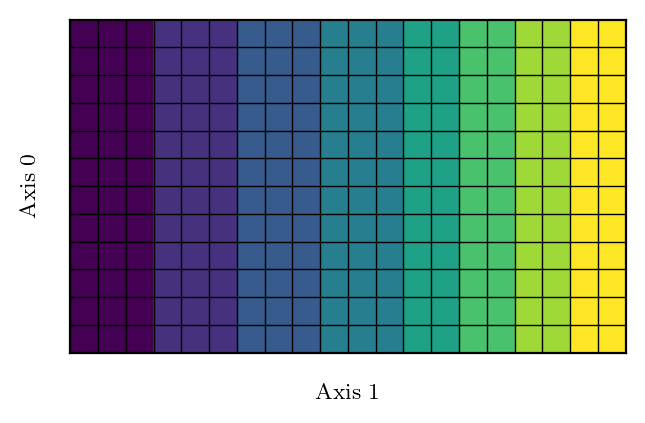

In [10]:
fig = plt.figure()

mesh = (2, 2, 2)
d = tc.dist.SlabDist(mesh, 1, 0)
tensor = torch.Size((12, 20))
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor, d)

/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  order = torch.tensor(order)
/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices_reorderd = torch.tensor(indices)[order].flip(0)
/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dims_reorderd = torch.tensor(dims)[order].flip(0)


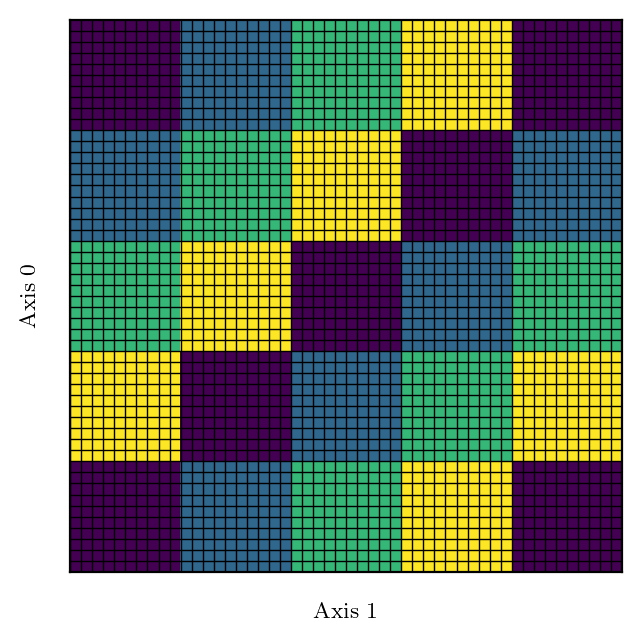

In [11]:
fig = plt.figure()
mesh = (2, 2)
d = tc.dist.TileDist(mesh, 10)
tensor = torch.Size((50, 50))
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor, d)

torch.Size([9, 9, 9]) torch.Size([9, 9, 9, 4]) torch.Size([9, 9, 9, 4])


/home/juanpedroghm/.pyenv/versions/3.10.10/envs/tensorcraft/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


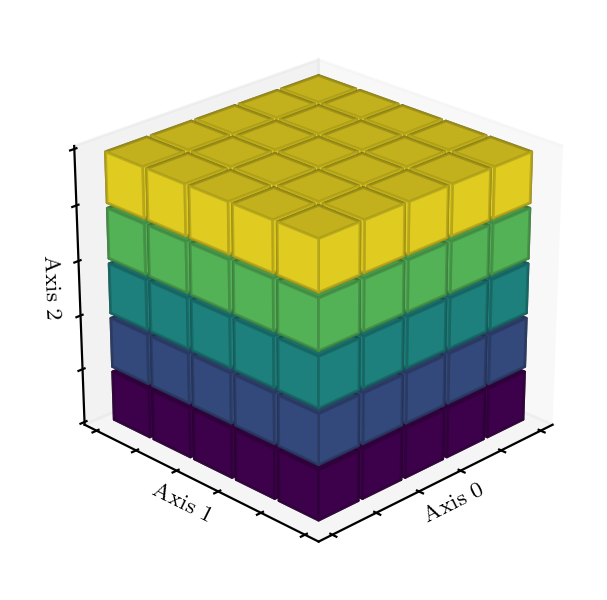

In [12]:
fig = plt.figure()
# dist = tc.dist.TileDist(8, 1)
dist = tc.dist.SlabDist(5, 2)
shape = torch.Size((5, 5, 5))
tc.viz.draw_3d_tensor(fig.add_subplot(111, projection="3d"), shape, dist)